# 4. MACHINE LEARNING MODEL
___

### 4.1. LOGISTIC REGRESSION MODEL

In [2]:
# LIBRARIES
import pandas as pd

train_data = pd.read_csv(r'C:\Users\rnogu\OneDrive\Documentos\GitHub\Logistic-Regression-Project-Tutorial-Fouine\data\processed\clean_bank_train.csv')
test_data = pd.read_csv(r'C:\Users\rnogu\OneDrive\Documentos\GitHub\Logistic-Regression-Project-Tutorial-Fouine\data\processed\clean_bank_test.csv')

target = 'y'
train_data.head()

,job,default,cons.price.idx,cons.conf.idx,euribor3m,y
0,10.0,0.0,93.918,-42.7,4.959,0
1,2.0,0.0,94.465,-41.8,4.864,0
2,2.0,0.0,93.444,-36.1,4.963,0
3,2.0,0.0,93.994,-36.4,4.860,0
4,3.0,1.0,92.893,-46.2,1.291,0


In [6]:
# DROP COLUMN 'Y'
X_train = train_data.drop([target], axis = 1)
y_train = train_data[target]
X_test = test_data.drop([target], axis = 1)
y_test = test_data[target]

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [9]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8841670713938805

true positives: 7205
true negatives: 77
false positives: 894
false negatives: 60


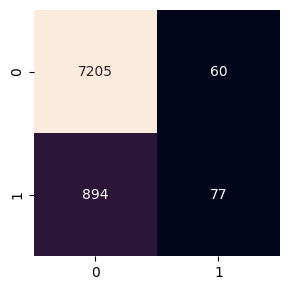

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

data_cm = confusion_matrix(y_test, y_pred)

print(f'true positives:',data_cm[0][0])
print(f'true negatives:',data_cm[1][1])
print(f'false positives:',data_cm[1][0])
print(f'false negatives:',data_cm[0][1])

# Let's draw this matrix to make it more visual
cm_df = pd.DataFrame(data_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)
plt.tight_layout()
plt.show()


### 4.2. HYPERPARAMETRER OPTIMIZATION (HPO)

4.2.1. GRID SEARCH

In [19]:
from sklearn.model_selection import GridSearchCV

# We define the parameters by hand that we want to adjust
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# We initialize the grid
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [20]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

c:\Users\rnogu\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\rnogu\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\rnogu\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\rnogu\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\rnogu\AppData\Local\Programs\Python\Python312\Lib\s

Best hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


In [21]:
model_grid = LogisticRegression(penalty = "l2", C = 10, solver = "lbfgs")
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.8841670713938805

Conclusion: The grid analysis has not improved the accuracy of the model.

4.2.2. RANDOM SEARCH

In [22]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# We define the parameters we want to adjust
hyperparams = {
    "C": np.logspace(-4, 4, 20),
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# We initialize the random search
random_search = RandomizedSearchCV(model, hyperparams, n_iter = 100, scoring = "accuracy", cv = 5, random_state = 42)
random_search

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [23]:
random_search.fit(X_train, y_train)

print(f"Best hyperparameters: {random_search.best_params_}")

c:\Users\rnogu\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\rnogu\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\rnogu\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\rnogu\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\rnogu\AppData\Local\Pro

Best hyperparameters: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 10000.0}


In [24]:
model_random_search = LogisticRegression(penalty = "l2", C = 10000, solver = "newton-cg")
model_random_search.fit(X_train, y_train)
y_pred = model_random_search.predict(X_test)

random_search_accuracy = accuracy_score(y_test, y_pred)
random_search_accuracy

0.8841670713938805

Conclusion: The random search analysis has not improved the accuracy of the model.

## GENERAL CONCLUSIONS
___

1. The logistic regression model performed with the given data has a 88,42 % probability of predict whether a client is going to take out a long-term deposit.  

2. The main weakness of this model are false positives, which means that the model sometimes will make wrong predictions about clients are not going to open the account.

3. The hyperparameter optimization was unable to increase the % rate of the model. 